In [ ]:

from google.colab import drive
drive.mount('/content/drive')


# Load data and prepare it for training
file_path = ".../PD.xlsx"


Mounted at /content/drive


In [ ]:

import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
# Load your data (replace 'file_path' with the actual path to your data)
df = pd.read_excel(file_path)
features = 	['mdvp_fo_hz','mdvp_fhi_hz', 'mdvp_flo_hz',	'mdvp_jitter', 	'mdvp_jitter_abs', 'mdvp_rap', 'mdvp_ppq', 'jitter_ddp', 'mdvp_shimmer',	'mdvp_shimmer_db',	'shimmer_apq3',	'shimmer_apq5',	'mdvp_apq',	'shimmer_dda',	'nhr',	'hnr', 'rpde',	'dfa',	'spread1',	'spread2',	'd2',	'ppe'	]
X = df[features]
y = df['status']


In [ ]:
len(features)

22

In [ ]:
Healthy_Index = []

In [ ]:
Healthy_Index = df[df['status']==False].index
Healthy_Index
len(Healthy_Index)

48

In [ ]:
HI = Healthy_Index.to_list()
type(HI)

list

In [ ]:
import random
Test_Healthy_Index = random.sample(HI, 5)
#Healthy_Index_Test = random.sample(Healthy_Index, 5)
THI=Test_Healthy_Index
type(THI)
HI2= [x for x in HI if x not in THI]


In [ ]:
HI2

In [ ]:
Test_Healthy = df.loc[THI]
Test_Healthy

In [ ]:
Train_Healthy = df.loc[HI2]
Train_Healthy
len(Train_Healthy)

In [ ]:
PD_Index = []
PD_Index = df[df['status']== True].index
PD_Index = PD_Index.to_list()
len(PD_Index)


In [ ]:
import random
Test_PD_Index = random.sample(PD_Index, 5)
#Healthy_Index_Test = random.sample(Healthy_Index, 5)
TPD=Test_PD_Index
type(TPD)
PD_Index2= [x for x in PD_Index if x not in TPD]
len(PD_Index2)

In [ ]:
Test_PD = df.loc[TPD]
Train_PD = df.loc[PD_Index2]
Train_PD

In [ ]:
Testdata = pd.concat([Test_Healthy,Test_PD], ignore_index=True)

In [ ]:
Testdata

In [ ]:
Train_PD
Train_Healthy

In [ ]:
data = pd.concat([Train_PD,Train_Healthy], ignore_index=True)

In [ ]:
data
len(data)

In [ ]:
X = data[features]
y = data['status']
len(y)

In [ ]:
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
class_counts = pd.Series(y_resampled).value_counts()
print(class_counts)

In [ ]:
X = X_resampled
y = y_resampled

In [ ]:
! pip install sdv

In [ ]:
from sdv.single_table import TVAESynthesizer
from sdv.metadata import SingleTableMetadata
real_data = []
real_data = X.join(y)
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=real_data)
synthesizer = TVAESynthesizer(
    metadata, # required
    enforce_min_max_values=True,
    enforce_rounding=False,
    epochs=500
)
synthesizer.fit(real_data)
synthetic_data = synthesizer.sample(num_rows=len(y))

In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 253/253 [00:02<00:00, 110.75it/s]

Overall Quality Score: 81.89%

Properties:
- Column Shapes: 80.84%
- Column Pair Trends: 82.93%


In [ ]:
New_data = real_data.append(synthetic_data, ignore_index=True)
#New_data = real_data.concat(synthetic_data, ignore_index=True)
New_data
len(New_data)

<ipython-input-25-fd1b6b317d92>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  New_data = real_data.append(synthetic_data, ignore_index=True)


172

In [ ]:
X = New_data[features]
y =  New_data['status']
class_counts = pd.Series(y).value_counts()
print(class_counts)
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
class_counts = pd.Series(y_resampled).value_counts()
print(class_counts)

False    88
True     84
Name: status, dtype: int64
False    84
True     84
Name: status, dtype: int64


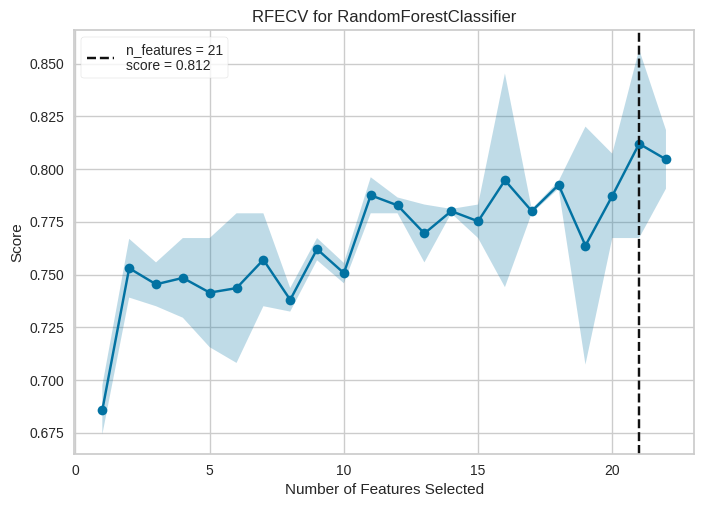

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import rfecv
from yellowbrick.datasets import load_credit


feature_names = features

cv = StratifiedKFold(2)
visualizer = rfecv(RandomForestClassifier(n_estimators=55, max_depth=8, min_samples_split=8, random_state=42)
, X=X, y=y, cv=cv, scoring='f1_macro')


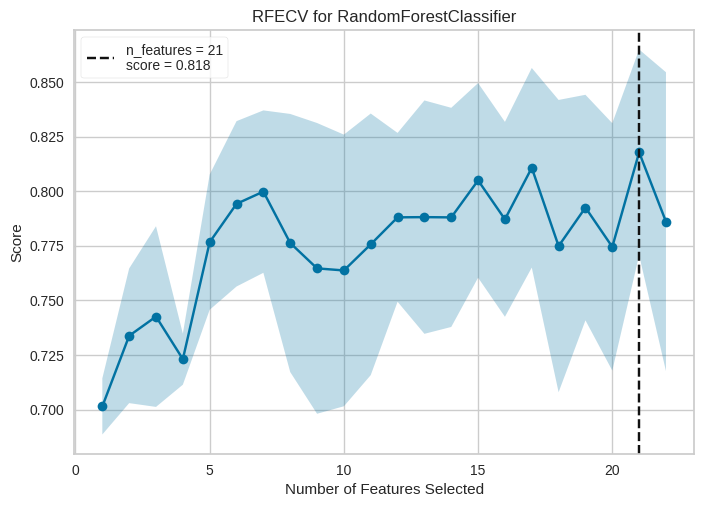

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import rfecv
from yellowbrick.datasets import load_credit


feature_names = features

cv = StratifiedKFold(3)
visualizer = rfecv(RandomForestClassifier(n_estimators=55, max_depth=8, min_samples_split=8, random_state=42)
, X=X, y=y, cv=cv, scoring='f1_macro')


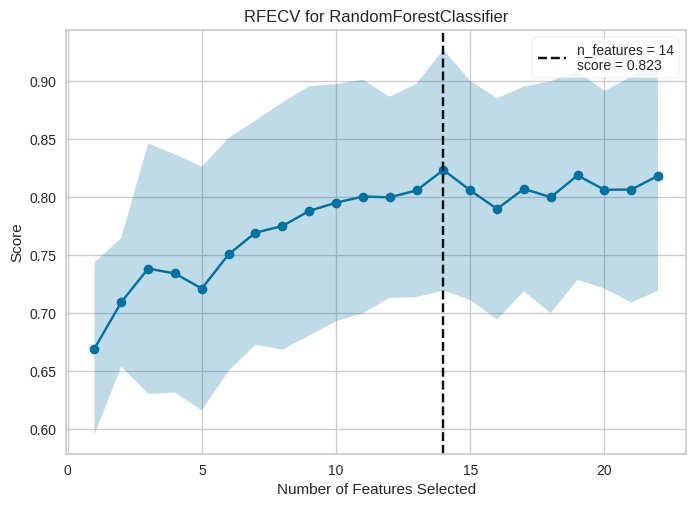

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import rfecv
from yellowbrick.datasets import load_credit


feature_names = features

cv = StratifiedKFold(6)
visualizer = rfecv(RandomForestClassifier(n_estimators=55, max_depth=8, min_samples_split=8, random_state=42)
, X=X, y=y, cv=cv, scoring='f1_macro')


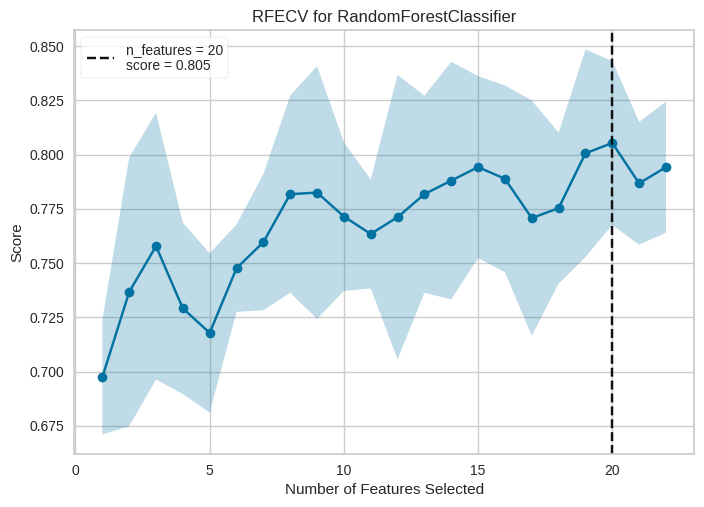

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import rfecv
from yellowbrick.datasets import load_credit


feature_names = features

cv = StratifiedKFold(4)
visualizer = rfecv(RandomForestClassifier(n_estimators=55, max_depth=8, min_samples_split=8, random_state=42)
, X=X, y=y, cv=cv, scoring='f1_macro')


In [ ]:
# Fit the RFE with cross-validation

X_new = visualizer.fit_transform(X, y)
selected_feature_indices =[]
# Get the selected feature indices
selected_feature_indices = visualizer.support_

# Get the names of the selected features
selected_feature_names = [feature_names[i] for i, is_selected in enumerate(selected_feature_indices) if is_selected]
print(selected_feature_names)

['mdvp_fo_hz', 'mdvp_fhi_hz', 'mdvp_ppq', 'jitter_ddp', 'mdvp_shimmer', 'mdvp_shimmer_db', 'shimmer_apq5', 'mdvp_apq', 'shimmer_dda', 'nhr', 'hnr', 'spread1', 'spread2', 'ppe']


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Encode categorical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_selected = X_new
y = y_encoded

# List of classifiers to evaluate
classifiers = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    XGBClassifier(),
    SVC(),
]

param_grids = [

      # RandomForestClassifier
    {
        'n_estimators': [8, 10, 15, 20, 25],
        'max_depth': [2, 5, 10, 20, 30, 40],
        'min_samples_split': [2, 4, 6, 8],
        'min_samples_leaf': [1, 2, 3, 4, 5, 6],
        'max_features': ['auto', 'sqrt', 'log2'],
    },

     # GradientBoostingClassifier
    {
        'n_estimators': [120, 150, 180, 200],
        'learning_rate': [ 0.1, 0.15, 0.17, 0.2],
        'max_depth': [8, 10, 15, 20],
        'min_samples_split': [8, 10, 12, 14],
    },

      # ExtraTreesClassifier
    {
        'n_estimators': [78, 80, 82, 84, 90, 95, 100, 110, 120],
        'max_depth': [30, 36, 38, 40, 42, 44, 46, 48],
        'min_samples_split': [2, 4, 6, 8],
        'min_samples_leaf': [ 1, 2, 3, 4],
        'max_features': ['auto', 'sqrt', 'log2'],
    },

    # AdaBoostClassifier
    {
        'n_estimators': [80, 90, 95, 100, 110, 120],
        'learning_rate': [0.005, 0.009, 0.01, 0.015],
    },

   # DecisionTreeClassifier
    {
        'max_depth': [18, 20, 22, 24, 26, 28],
        'min_samples_split': [2, 3, 4, 5, 6],
        'min_samples_leaf': [1, 2, 4],
    },

     # XGBClassifier
    {
        'n_estimators': [80, 90, 100, 110, 120],
        'learning_rate': [0.02, 0.05, 0.09, 0.15],
        'max_depth': [2, 3, 4, 5],
    },
     #SVM
    {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']},

]

In [ ]:

import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# List of fold values to evaluate
fold_values = [6]

# Assuming you have already initialized 'X_resampled', 'y_resampled'

for fold in fold_values:
    print(f"Number of Folds: {fold}\n")

    for i, classifier in enumerate(classifiers):
        print(f"Classifier: {classifier.__class__.__name__}\n")

        # Initialize lists to store evaluation scores
        accuracy_scores = []
        f1_scores = []
        class_accuracies = []  # To store class-wise accuracies over folds
        class_f1_scores = []  # To store class-wise F1-scores over folds

        # Initialize StratifiedKFold
        stratified_kfold = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)

        # Create GridSearchCV object for the classifier
        grid_search = GridSearchCV(classifier, param_grids[i], cv=stratified_kfold, scoring='accuracy', n_jobs=-1)

        # Perform cross-validation with hyperparameter tuning

        # Perform cross-validation
        for fold_idx, (train_index, test_index) in enumerate(stratified_kfold.split(X_selected, y)):
            X_train, X_test = X_selected[train_index, :], X_selected[test_index, :]
            y_train, y_test = y[train_index], y[test_index]


            norm = MinMaxScaler().fit(X_train)
            X_train_norm = norm.transform(X_train)
            X_test_norm = norm.transform(X_test)
            X_train = X_train_norm
            X_test = X_test_norm

            # Fit classifier and evaluate
            grid_search.fit(X_train, y_train)
            best_classifier = grid_search.best_estimator_
            y_pred = best_classifier.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')

            accuracy_scores.append(accuracy)
            f1_scores.append(f1)

            # Calculate accuracy for each class and store in class_accuracies
            unique_classes, _ = np.unique(y_test, return_counts=True)
            class_accuracy = {}
            class_f1 = {}
            for class_label in unique_classes:
                class_accuracy[class_label] = accuracy_score(y_test[y_test == class_label], y_pred[y_test == class_label])
                class_f1[class_label] = f1_score(y_test[y_test == class_label], y_pred[y_test == class_label], average='macro')
            class_accuracies.append(class_accuracy)
            class_f1_scores.append(class_f1)

        # Calculate mean of class-wise accuracies over folds
        mean_class_accuracies = {}
        for class_label in unique_classes:
            mean_class_accuracy = np.mean([fold_accuracy[class_label] for fold_accuracy in class_accuracies])
            mean_class_accuracies[class_label] = mean_class_accuracy

        # Calculate mean and standard deviation of evaluation metrics
        mean_accuracy = np.mean(accuracy_scores)
        mean_f1 = np.mean(f1_scores)
        std_accuracy = np.std(accuracy_scores)
        std_f1 = np.std(f1_scores)

        # Print results for the current classifier and fold
        print("Best Parameters:", grid_search.best_params_)
        print("Mean Accuracy:", mean_accuracy)
        print("Mean F1-score:", mean_f1)
        print("Mean Class-wise Accuracies:", mean_class_accuracies)
        print("Standard Deviation of Accuracy:", std_accuracy)
        print("Standard Deviation of F1-score:", std_f1)
        print("\n")




Number of Folds: 6

Classifier: RandomForestClassifier



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 8}
Mean Accuracy: 0.8201970443349754
Mean F1-score: 0.8183442571370584
Mean Class-wise Accuracies: {0: 0.8984126984126984, 1: 0.7380952380952381}
Standard Deviation of Accuracy: 0.040652831853028086
Standard Deviation of F1-score: 0.040762515227598405


Classifier: GradientBoostingClassifier

Best Parameters: {'learning_rate': 0.2, 'max_depth': 10, 'min_samples_split': 14, 'n_estimators': 200}
Mean Accuracy: 0.7848932676518885
Mean F1-score: 0.7834983876585656
Mean Class-wise Accuracies: {0: 0.8412698412698413, 1: 0.7261904761904762}
Standard Deviation of Accuracy: 0.06611999527525794
Standard Deviation of F1-score: 0.06731769939281768


Classifier: ExtraTreesClassifier



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters: {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 82}
Mean Accuracy: 0.8657635467980295
Mean F1-score: 0.865461931502903
Mean Class-wise Accuracies: {0: 0.8968253968253969, 1: 0.8333333333333334}
Standard Deviation of Accuracy: 0.05239902967505011
Standard Deviation of F1-score: 0.0524062326590704


Classifier: AdaBoostClassifier

Best Parameters: {'learning_rate': 0.015, 'n_estimators': 100}
Mean Accuracy: 0.7789408866995075
Mean F1-score: 0.7761953426823612
Mean Class-wise Accuracies: {0: 0.8642857142857143, 1: 0.6904761904761904}
Standard Deviation of Accuracy: 0.05712900963238804
Standard Deviation of F1-score: 0.05976375694269785


Classifier: DecisionTreeClassifier

Best Parameters: {'max_depth': 26, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Accuracy: 0.7674466338259442
Mean F1-score: 0.7646875463501425
Mean Class-wise Accuracies: {0: 0.7984126984126984, 1: 0.7380952380952381}
Standard Deviation of 

In [ ]:
X_TEST = Testdata[features]
y_TEST =  Testdata['status']

In [ ]:
X_TEST

In [ ]:
X_new_Test = visualizer.fit_transform(X_TEST , y_TEST)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


# List of classifiers to evaluate
classifiers = [

    ExtraTreesClassifier(),
]

param_grids = [
      # ExtraTreesClassifier
    {
        'n_estimators': [82],
        'max_depth': [ 30],
        'min_samples_split': [ 2],
        'min_samples_leaf': [ 1],
        'max_features': ['auto'],
    },
]

In [ ]:

import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# List of fold values to evaluate
fold_values = [6]

# Assuming you have already initialized 'X_resampled', 'y_resampled'

for fold in fold_values:
    print(f"Number of Folds: {fold}\n")

    for i, classifier in enumerate(classifiers):
        print(f"Classifier: {classifier.__class__.__name__}\n")

        # Initialize lists to store evaluation scores
        accuracy_scores = []
        f1_scores = []
        class_accuracies = []  # To store class-wise accuracies over folds
        class_f1_scores = []  # To store class-wise F1-scores over folds

        # Initialize StratifiedKFold
        stratified_kfold = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)

        # Create GridSearchCV object for the classifier
        grid_search = GridSearchCV(classifier, param_grids[i], cv=stratified_kfold, scoring='accuracy', n_jobs=-1)

        # Perform cross-validation with hyperparameter tuning

        # Perform cross-validation
        for fold_idx, (train_index, test_index) in enumerate(stratified_kfold.split(X_selected, y)):
            X_train, X_test = X_selected[train_index, :], X_selected[test_index, :]
            y_train, y_test = y[train_index], y[test_index]


            norm = MinMaxScaler().fit(X_train)
            X_train_norm = norm.transform(X_train)
            X_test_norm = norm.transform(X_test)
            X_train = X_train_norm
            X_test = X_test_norm

            # Fit classifier and evaluate
            grid_search.fit(X_train, y_train)
            best_classifier = grid_search.best_estimator_
            y_pred = best_classifier.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')

            accuracy_scores.append(accuracy)
            f1_scores.append(f1)

            # Calculate accuracy for each class and store in class_accuracies
            unique_classes, _ = np.unique(y_test, return_counts=True)
            class_accuracy = {}
            class_f1 = {}
            for class_label in unique_classes:
                class_accuracy[class_label] = accuracy_score(y_test[y_test == class_label], y_pred[y_test == class_label])
                class_f1[class_label] = f1_score(y_test[y_test == class_label], y_pred[y_test == class_label], average='macro')
            class_accuracies.append(class_accuracy)
            class_f1_scores.append(class_f1)

        # Calculate mean of class-wise accuracies over folds
        mean_class_accuracies = {}
        for class_label in unique_classes:
            mean_class_accuracy = np.mean([fold_accuracy[class_label] for fold_accuracy in class_accuracies])
            mean_class_accuracies[class_label] = mean_class_accuracy

        # Calculate mean and standard deviation of evaluation metrics
        mean_accuracy = np.mean(accuracy_scores)
        mean_f1 = np.mean(f1_scores)
        std_accuracy = np.std(accuracy_scores)
        std_f1 = np.std(f1_scores)

        # Print results for the current classifier and fold
        print("Best Parameters:", grid_search.best_params_)
        print("Mean Accuracy:", mean_accuracy)
        print("Mean F1-score:", mean_f1)
        print("Mean Class-wise Accuracies:", mean_class_accuracies)
        print("Standard Deviation of Accuracy:", std_accuracy)
        print("Standard Deviation of F1-score:", std_f1)
        print("\n")




Number of Folds: 6

Classifier: ExtraTreesClassifier



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters: {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 82}
Mean Accuracy: 0.854679802955665
Mean F1-score: 0.8540529759244998
Mean Class-wise Accuracies: {0: 0.9087301587301587, 1: 0.7976190476190476}
Standard Deviation of Accuracy: 0.04650000167430451
Standard Deviation of F1-score: 0.04671721483530724




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:

norm = MinMaxScaler().fit(X_new_Test)
X_test_norm = norm.transform(X_new_Test)
X_new_Test = X_test_norm
y_pred = best_classifier.predict(X_new_Test)
label_encoder = LabelEncoder()
y_encoded_Test = label_encoder.fit_transform(y_TEST)
accuracy = accuracy_score(y_encoded_Test, y_pred)
f1 = f1_score(y_encoded_Test, y_pred, average='weighted')




In [ ]:
best_classifier

ExtraTreesClassifier(max_depth=30, max_features='auto', n_estimators=82)

In [ ]:

report = classification_report(y_encoded_Test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      1.00      0.67         5

    accuracy                           0.50        10
   macro avg       0.25      0.50      0.33        10
weighted avg       0.25      0.50      0.33        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 9.3 MB/s eta 0:00:00


In [ ]:
import shap
model = best_classifier
explainer = shap.Explainer(model)
shap_values = explainer(X_new_Test)
shap_values = explainer(X_new_Test)

In [ ]:

shap_values = explainer.shap_values (X_new_Test)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_new_Test)

In [ ]:
from IPython.display import display, HTML
import shap
import numpy as np
true_labels = y_test  # Replace y_true with your actual true labels
predicted_labels = model.predict(X_new_Test)

import shap
import numpy as np

# Assuming true_labels and predicted_labels are available

# Initialize the JavaScript library for SHAP visualizations
shap.initjs()

# Loop through each instance and create a force plot with true and predicted labels
for i in range(len(X_new_Test)):
    instance_true_label = true_labels[i]
    instance_predicted_label = predicted_labels[i]

    # Create the force plot for the i-th instance
    force_plot = shap.force_plot(explainer.expected_value[instance_true_label],
                                 shap_values[instance_true_label][i],
                                 X_test[i])

    # Display the true and predicted labels in the force plot title
    display(HTML(f'<h3>Instance {i + 1}</h3>'
                 f'True Label: {instance_true_label}<br>'
                 f'Predicted Label: {instance_predicted_label}'))
    display(force_plot)